In [ ]:
import pandas as pd
import numpy as np

### Arjun Bhan
### 10/4/21

In [ ]:
df = pd.read_csv("https://foxweb.marist.edu/users/jf4n/DATA_FILES/NYChousing.csv")

In [ ]:
df=df.drop(columns=['Neighborhood'])

In [ ]:
df['Age']=2012-df['YearBuilt']

Question #1

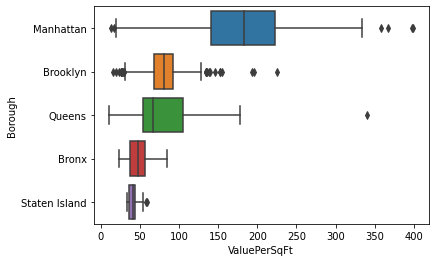

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot( y=df["Borough"], x=df["ValuePerSqFt"] );
plt.show()

Question #2

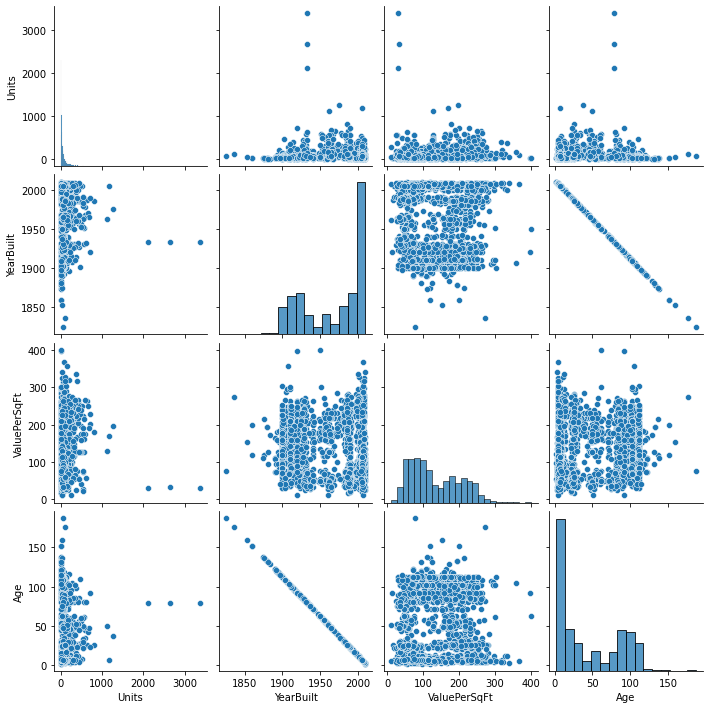

In [ ]:
g = sns.pairplot(df,vars=["Units","YearBuilt","ValuePerSqFt","Age"])

import matplotlib.pyplot as plt
plt.show()
### The only variable that seem to have a linear a relationship with a different variable is age and year built
### which makes sense because age is derived from years built.

Question #3

In [ ]:
df

,Units,YearBuilt,SqFt,Borough,ValuePerSqFt,Age
0,42.0,1920.0,36500.0,Manhattan,200.00,92.0
1,78.0,1985.0,126420.0,Manhattan,242.76,27.0
2,282.0,1930.0,249076.0,Manhattan,271.23,82.0
3,239.0,1985.0,219495.0,Manhattan,247.48,27.0
4,133.0,1986.0,139719.0,Manhattan,191.37,26.0
...,...,...,...,...,...,...
2620,52.0,NaN,62391.0,Staten Island,53.76,NaN
2621,102.0,1987.0,90618.0,Staten Island,57.75,25.0
2622,100.0,1986.0,78903.0,Staten Island,59.40,26.0
2623,159.0,1961.0,166712.0,Staten Island,35.80,51.0


In [ ]:
X=df[['Units','YearBuilt','SqFt','Borough','Age']]
y=df['ValuePerSqFt']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

Question #4-6

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
num_xformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_xformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown='ignore'))

In [ ]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
preprocessor = make_column_transformer(( num_xformer, numeric_features),(cat_xformer, categorical_features))

penalized Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
pipereg = make_pipeline(preprocessor, Ridge(100))

In [ ]:
pipereg.fit(X_train, y_train);

In [ ]:
pen_lin_y_pred = pipereg.predict(X_test)

#7

In [ ]:
from sklearn.linear_model import LinearRegression
pipelr = make_pipeline(preprocessor, LinearRegression())

In [ ]:
pipelr.fit(X_train, y_train);

In [ ]:
lin_y_pred = pipelr.predict(X_test)

In [ ]:
def RegularizedRegression( **kwargs):    
   return make_pipeline( preprocessor,
                        Ridge(alpha=0.01))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {'ridge__alpha': [0,0.001,0.01,0.1,1]}

grid = GridSearchCV(RegularizedRegression(), 
                    param_grid, 
                    scoring= 'neg_mean_absolute_error',
                    cv=5,
                    n_jobs = -1,
                    verbose = 5)

In [ ]:
grid.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


In [ ]:
grid_y_pred = grid.predict(X_test)

#8

In [ ]:
### Linear Regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'MAE = {mean_absolute_error(lin_y_pred,y_test):.3f}')
MSE= mean_squared_error(lin_y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 31.609
MSE = 1870.240
RMSE= 43.246


In [ ]:
### Ride Regression
print(f'MAE = {mean_absolute_error(grid_y_pred,y_test):.3f}')
MSE= mean_squared_error(grid_y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 31.609
MSE = 1870.240
RMSE= 43.246


In [ ]:
### Penalized Linear Regression
print(f'MAE = {mean_absolute_error(pen_lin_y_pred,y_test):.3f}')
MSE= mean_squared_error(pen_lin_y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

MAE = 33.993
MSE = 1967.117
RMSE= 44.352


All regressions have relatively similar values. This makes sense because they are trained using the same data.